<a href="https://colab.research.google.com/github/bardbyte/bardbyte.github.io/blob/main/AlphaGrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alpha Grid SWE Pre-interview
### Directions: please make a copy, complete all the questions, and then email the doc to phil@alphagrid.ai.








#### A charger monitoring system receives data from a charger, stores it in a buffer, then transmits it to the cloud. The following plot shows the diagnostic telemetry. The receive rate and transmit rate are correct, but the buffer size telemetry is incorrect. Which is the first time interval that shows the error?



Please implement the following function
```
def fill_tank(tank_size: int, bucket_sizes: List[int]) -> List[int]:
 """Returns the bucket scoops needed to fill a tank of a given size.

 You're trying to fill a tank exactly full of water by scooping water from an
 infinite reservoir using a set of buckets. The goal is to find the bucket
 scoops that exactly fill the tank while minimizing the number of scoops
 needed.

 Examples:
   fill_tank(20, [6, 4, 3, 2]) => [6, 6, 4 ,4]
   fill_tank(6, [5, 4, 2]) => [4, 2]
   fill_tank(3, [2]) => None
 """
 ```






# Please create a pie chart that shows a breakdown of how you would prefer to spend your time during an average working day.

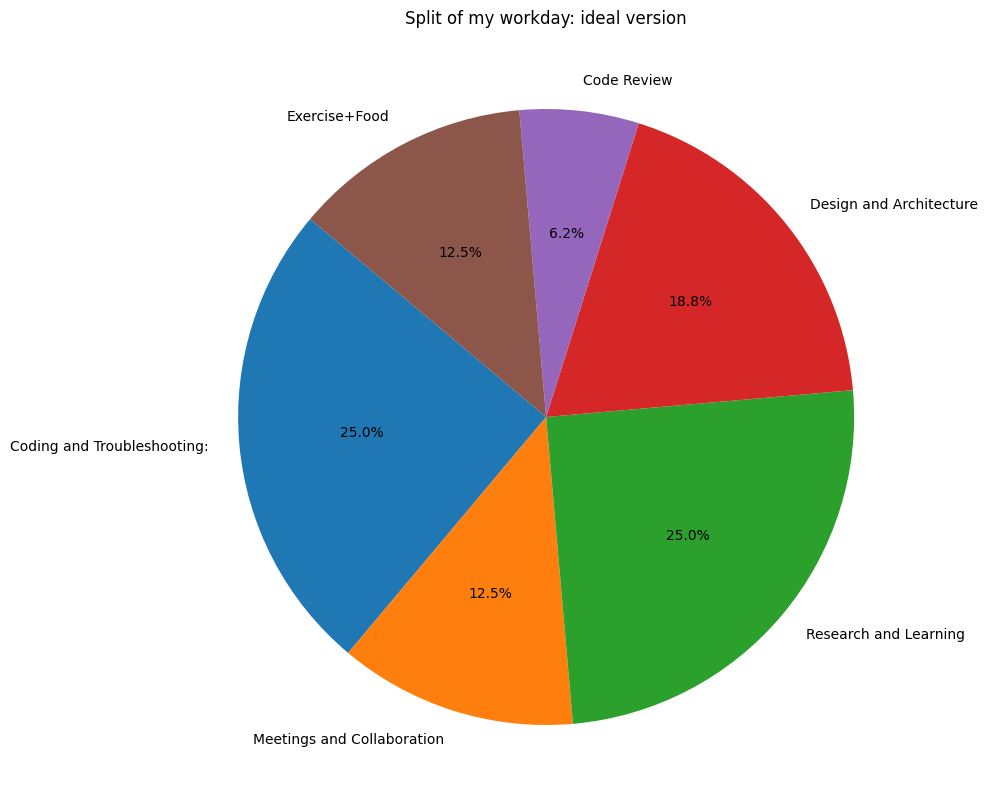

In [3]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding time in hours
categories = ['Coding and Troubleshooting:', 'Meetings and Collaboration', 'Research and Learning', 'Design and Architecture', 'Code Review', 'Exercise+Food']
time_spent = [2, 1, 2, 1.5, 0.5, 1]  # Total should be 8 hours

# Convert time spent to percentages
percentages = [t / 8 * 100 for t in time_spent]

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Split of my workday: ideal version')
plt.show()


# Please find a URL that will return a JSON collection of all of Tesla’s Superchargers, stores, service centers, body shops, destination chargers, and demo drive locations.


> www.tesla.com/findus/list/superchargers should be able to help us write a script that will get us the JSON data.


Here's a rundown of my Tesla store data hunt: found this link which should help us get the information we are looking for. (https://www.tesla.com/findus/list/superchargers)


*   Tried an unofficial Tesla API, but it didn't have the right info.
* Tesla has launched their official API in October 2023 (I believe) but that is just for Tesla fleet data and not the data for what we are looking for.
*   Examined the site's network traffic and found only a v1_{} file with basic settings.
* No clear no-go in the www.tesla.com/robots.txt for scraping the url: https://www.tesla.com/findus/list/superchargers.
* Faced challenges with web scraping due to redirects and server delays, as the server redirects to tesla.com/findus/lists --> I feel this is because although there is no clear sign to disallow scraping this in the robots.txt file, they still don't want scrapers to be successful, or there is js rendered content which is preventing scraping using the basic requests library in python.

>**Alternatives:** Thinking of using browser-like tools (Selenium) should get us scraped data or we can get it from a data collector: ScrapeHero for 60$, ***alongside considering brute - force manually parsing HTML***.

* If all else fails, **might reach out to Tesla directly for data access**.

In [4]:
"""Script will enable the user to download a JSON response of Tesla locations"""

import requests
from requests.exceptions import Timeout
from bs4 import BeautifulSoup

URL = 'https://www.tesla.com/findus/list/superchargers'

try:
    response = requests.get(URL, headers={'User-Agent': 'Mozilla/5.0'}, timeout=60)
    response.raise_for_status()  # will raise an HTTPError if the HTTP request returned an unsuccessful status code
except Timeout:
    print("The request timed out")
except requests.HTTPError as err:
    print(f"HTTP error occurred: {err}")
except Exception as err:
    print(f"An error occurred: {err}")



The request timed out


# A charger monitoring system receives data from a charger, stores it in a buffer, then transmits it to the cloud. The following plot shows the diagnostic telemetry. The receive rate and transmit rate are correct, but the buffer size telemetry is incorrect. Which is the first time interval that shows the error?


> Answer is D

# Please implement the following function
```
def num_charging_stops(legs: List[int], capacity: int) -> int:
  """Calculates the number of necessary charging stops to reach the destination.

  Each "leg" of your journey represents the amount of energy required to drive
  that leg of the trip. For example, if a leg has a value of 5 and your
  battery's energy level before driving the leg is 12, then driving that leg
  will drop the battery's energy level to 7 (12-5). After driving each leg, you
  have the choice of whether to charge or not. If you decide to charge, your
  battery's energy level get's returned to "capacity". If you decide not to
  charge, your battery's energy level is unchanged. The goal is to calculate
  the minimum number of charging stops needed to reach the destination without
  ever letting your battery's level fall below 0. If it isn't possible to reach
  the destination with the given inputs, -1 should be returned.

  Assume that your battery is charged to full capacity to start.

  Examples:
    num_charging_stops([25], 30) -> 0
    num_charging_stops([25, 25], 30) -> 1
    num_charging_stops([50], 30) -> -1
    num_charging_stops([15, 15, 30]) -> 1
    num_charging_stops([15, 30, 15]) -> 2
  """
```

# Please implement the following function
```
def fill_tank(tank_size: int, bucket_sizes: List[int]) -> List[int]:
 """Returns the bucket scoops needed to fill a tank of a given size.

 You're trying to fill a tank exactly full of water by scooping water from an
 infinite reservoir using a set of buckets. The goal is to find the bucket
 scoops that exactly fill the tank while minimizing the number of scoops
 needed.

 Examples:
   fill_tank(20, [6, 4, 3, 2]) => [6, 6, 4 ,4]
   fill_tank(6, [5, 4, 2]) => [4, 2]
   fill_tank(3, [2]) => None
 """
 ```



In [12]:
from typing import List
def fill_tank(bucket_sizes: List[int], tank_size: int) -> List[int]:
    # Initialize cache for minimum coins
    min_buckets_cache = [tank_size+1] * (tank_size + 1)
    min_buckets_cache[0] = 0

    # Populate the cache with the minimum number of coins for each amount
    for current_tank_size in range(1, tank_size + 1):
        for scoop in bucket_sizes:
            if current_tank_size - scoop >= 0:
                min_buckets_cache[current_tank_size] = min(
                    min_buckets_cache[current_tank_size],
                    min_buckets_cache[current_tank_size - scoop] + 1)


    if min_buckets_cache[tank_size] == (tank_size+1):
        return None  # No solution found
    # Backtrack to find the bucket_scoops used
    scoops_used = []
    while tank_size > 0:
        for scoops in bucket_sizes:
            if ((tank_size - scoops) >= 0) and (
                min_buckets_cache[tank_size] == min_buckets_cache[tank_size - scoops] + 1):
                scoops_used.append(scoops)
                tank_size -= scoops
                break

    return scoops_used

print(fill_tank ([6,4,3,2], 20))

print(fill_tank ([5, 4, 2],6))

print(fill_tank ([3], 3))

[6, 6, 6, 2]
[4, 2]
[3]
